In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cantonioupao/oxford-flower-17categories-labelled")

print("Path to dataset files:", path)

from tensorflow.keras.utils import image_dataset_from_directory

data =  image_dataset_from_directory(
    path + '/17FlowerOxfordDataset',
)

Path to dataset files: C:\Users\ahmed\.cache\kagglehub\datasets\cantonioupao\oxford-flower-17categories-labelled\versions\1
Found 1360 files belonging to 15 classes.


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [12]:
model = Sequential([
    Conv2D(25, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPool2D(2,2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(15, activation='softmax')
])

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
images = []
labels = []

for image_batch, label_batch in data:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

labels[:5]

[6, 13, 9, 3, 3]

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    images,labels
)

In [17]:
model.fit(np.array(X_train), np.array(y_train))

32/32 [==============================] - 3s 56ms/step - loss: 131.8787 - accuracy: 0.1108


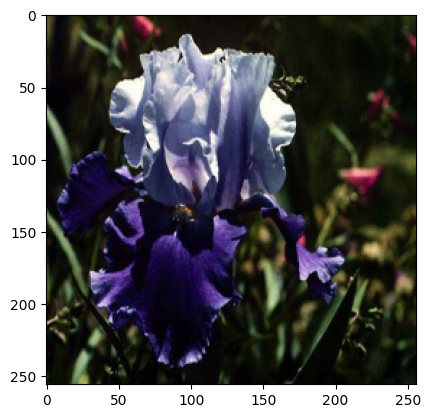

In [19]:
import matplotlib.pyplot as plt 

plt.imshow(X_test[0] / np.max(X_test[0]))

In [20]:
image = X_test[0]
label = y_test[0]

In [49]:
concept_activations = model.predict(np.expand_dims(image, axis=0))
concept_activations 

1/1 [==============================] - 0s 37ms/step


array([[0.06680207, 0.06618854, 0.06628123, 0.06627005, 0.06620257,
        0.06635145, 0.06805113, 0.06683967, 0.06651843, 0.06679973,
        0.06773997, 0.06659081, 0.06638167, 0.06646723, 0.06651548]],
      dtype=float32)

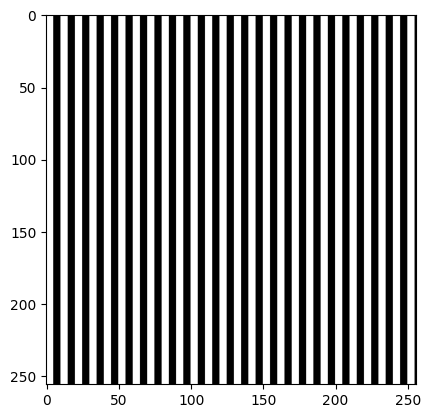

In [50]:
# Generate striped images
striped = np.zeros((256,256,3))

for i in range(0,256,10):
    striped[:,i:i+5,:] = 256

plt.imshow(striped / np.max(striped))

In [61]:
concept_activations
striped

X = np.concatenate([
    concept_activations, np.random.normal(size=concept_activations.shape)
])
y= [0,1]

In [62]:
from sklearn.linear_model import SGDClassifier

In [63]:
m = SGDClassifier()
m.fit(X,y)

SGDClassifier()

In [72]:
cav = m.coef_
cav

np.absolute(np.mean(cav)).round() / np.max(np.absolute(np.mean(cav)))

0.9786029433558797